# streamlining plotting in pandas

In [1]:
import yahoo_fin.stock_info as si
import requests
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
# Getting the actual company name from a stock ticker symbol
def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    result = requests.get(url).json()
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

In [8]:
get_symbol('AAPL')

'Apple Inc.'

In [6]:
few_days = si.get_data('aapl', start_date = '01/01/2020', end_date = '03/31/2021')

In [7]:
few_days

open        high         low       close    adjclose  \
2020-01-02   74.059998   75.150002   73.797501   75.087502   74.333511   
2020-01-03   74.287498   75.144997   74.125000   74.357498   73.610840   
2020-01-06   73.447502   74.989998   73.187500   74.949997   74.197395   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.848442   
2020-01-08   74.290001   76.110001   74.290001   75.797501   75.036385   
...                ...         ...         ...         ...         ...   
2021-03-24  122.820000  122.900002  120.070000  120.089996  120.089996   
2021-03-25  119.540001  121.660004  119.000000  120.589996  120.589996   
2021-03-26  120.349998  121.480003  118.919998  121.209999  121.209999   
2021-03-29  121.650002  122.580002  120.730003  121.389999  121.389999   
2021-03-30  120.110001  120.400002  118.860001  119.900002  119.900002   

               volume ticker  
2020-01-02  135480400   AAPL  
2020-01-03  146322800   AAPL  
2020-01-06  118387200   AAPL  
2020-01-07  108872000   AAPL  
2020-01-08  132079200   AAPL  
...               ...    ...  
2021-03-24   88530500   AAPL  
2021-03-25   98844700   AAPL  
2021-03-26   93958900   AAPL  
2021-03-29   80819200   AAPL  
2021-03-30   85671900   AAPL  

[313 rows x 7 columns]

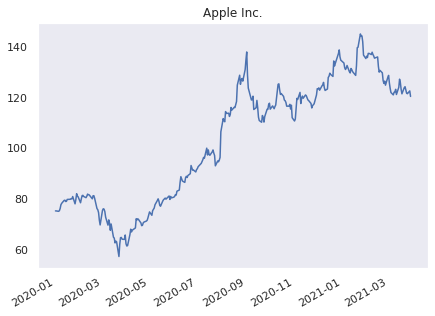

In [54]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(few_days.index, few_days.high)
ax.set_title(get_symbol('AAPL'))
fig.autofmt_xdate()

<AxesSubplot:>

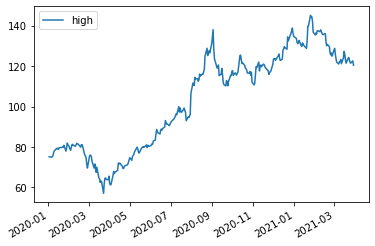

In [12]:
few_days.plot(y='high')

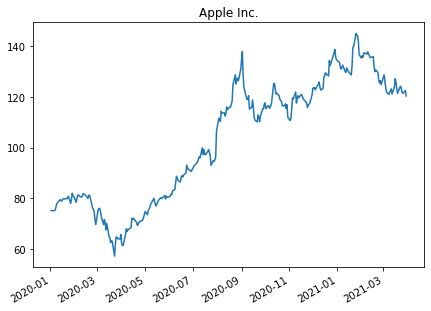

In [13]:
few_days.plot(y='high',
              figsize=(7,5),
              title=get_symbol('AAPL'),
              legend=False);

# Preview of next week

In [15]:
def plotdows(ticker='AAPL'):
    few_days = si.get_data(ticker, start_date = '01/01/2020', end_date = '03/31/2021')
    fig,ax = plt.subplots(1,1,figsize=(7,5))
    ax.plot(few_days.index, few_days.high)
    ax.set_title(get_symbol(ticker))
    fig.autofmt_xdate()
    
dow_list = si.tickers_dow()
ipywidgets.interactive(plotdows,ticker=dow_list)

interactive(children=(Dropdown(description='ticker', options=('AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO…

In [18]:
appl_top_6 = pd.read_csv('holdings-of-appl-top-6.csv')

In [19]:
appl_top_6

Company  Vanguard Group, Inc. (The)  \
0                                    Apple Inc.                        7.48   
1                                    Amgen Inc.                        8.20   
2                      American Express Company                        5.85   
3                            The Boeing Company                        7.05   
4                              Caterpillar Inc.                        8.47   
5                          salesforce.com, inc.                        7.67   
6                           Cisco Systems, Inc.                        7.83   
7                           Chevron Corporation                        8.18   
8                       The Walt Disney Company                        8.03   
9                                      Dow Inc.                        8.05   
10                The Goldman Sachs Group, Inc.                        7.42   
11                         The Home Depot, Inc.                        8.35   
12                 Honeywell International Inc.                        7.40   
13  International Business Machines Corporation                        8.26   
14                            Intel Corporation                        8.33   
15                            Johnson & Johnson                        8.66   
16                         JPMorgan Chase & Co.                        8.03   
17                        The Coca-Cola Company                        7.25   
18                       McDonald's Corporation                        8.70   
19                                   3M Company                        7.77   
20                            Merck & Co., Inc.                        8.24   
21                        Microsoft Corporation                        8.14   
22                                   NIKE, Inc.                        8.15   
23                 The Procter & Gamble Company                        8.85   
24                The Travelers Companies, Inc.                        8.62   
25              UnitedHealth Group Incorporated                        8.37   
26                                    Visa Inc.                        8.50   
27                  Verizon Communications Inc.                        7.87   
28               Walgreens Boots Alliance, Inc.                        6.72   
29                                 Walmart Inc.                        4.69   

    Blackrock Inc.  Berkshire Hathaway, Inc  State Street Corporation  \
0             6.29                     5.28                      3.80   
1             8.30                     0.00                      5.23   
2             5.78                    18.87                      4.08   
3             5.36                     0.00                      4.44   
4             6.53                     0.00                      7.56   
5             7.10                     0.00                      4.40   
6             7.76                     0.00                      4.25   
7             6.58                     2.52                      6.63   
8             6.35                     0.00                      3.93   
9             6.03                     0.00                      4.79   
10            6.10                     0.00                      5.74   
11            6.67                     0.00                      4.51   
12            6.16                     0.00                      4.97   
13            6.97                     0.00                      5.81   
14            7.60                     0.00                      4.36   
15            7.16                     0.00                      5.47   
16            6.35                     0.00                      4.46   
17            6.56                     9.28                      3.97   
18            6.80                     0.00                      4.83   
19            7.11                     0.00                      5.19   
20            7.71                     0.00              

<AxesSubplot:xlabel='Company'>

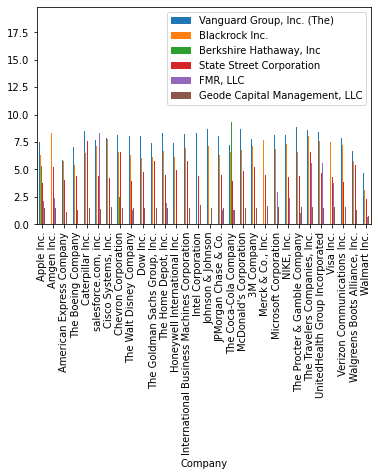

In [22]:
appl_top_6.plot.bar(x='Company')

In [24]:
appl_top_6.sort_values('Vanguard Group, Inc. (The)')

Company  Vanguard Group, Inc. (The)  \
29                                 Walmart Inc.                        4.69   
2                      American Express Company                        5.85   
28               Walgreens Boots Alliance, Inc.                        6.72   
3                            The Boeing Company                        7.05   
17                        The Coca-Cola Company                        7.25   
12                 Honeywell International Inc.                        7.40   
10                The Goldman Sachs Group, Inc.                        7.42   
0                                    Apple Inc.                        7.48   
5                          salesforce.com, inc.                        7.67   
19                                   3M Company                        7.77   
6                           Cisco Systems, Inc.                        7.83   
27                  Verizon Communications Inc.                        7.87   
8                       The Walt Disney Company                        8.03   
16                         JPMorgan Chase & Co.                        8.03   
9                                      Dow Inc.                        8.05   
21                        Microsoft Corporation                        8.14   
22                                   NIKE, Inc.                        8.15   
7                           Chevron Corporation                        8.18   
1                                    Amgen Inc.                        8.20   
20                            Merck & Co., Inc.                        8.24   
13  International Business Machines Corporation                        8.26   
14                            Intel Corporation                        8.33   
11                         The Home Depot, Inc.                        8.35   
25              UnitedHealth Group Incorporated                        8.37   
4                              Caterpillar Inc.                        8.47   
26                                    Visa Inc.                        8.50   
24                The Travelers Companies, Inc.                        8.62   
15                            Johnson & Johnson                        8.66   
18                       McDonald's Corporation                        8.70   
23                 The Procter & Gamble Company                        8.85   

    Blackrock Inc.  Berkshire Hathaway, Inc  State Street Corporation  \
29            3.09                     0.00                      2.28   
2             5.78                    18.87                      4.08   
28            5.78                     0.00                      5.42   
3             5.36                     0.00                      4.44   
17            6.56                     9.28                      3.97   
12            6.16                     0.00                      4.97   
10            6.10                     0.00                      5.74   
0             6.29                     5.28                      3.80   
5             7.10                     0.00                      4.40   
19            7.11                     0.00                      5.19   
6             7.76                     0.00                      4.25   
27            7.22                     3.54                      3.89   
8             6.35                     0.00                      3.93   
16            6.35                     0.00                      4.46   
9             6.03                     0.00                      4.79   
21            6.83                     0.00                      3.97   
22            7.30                     0.00                      4.28   
7             6.58                     2.52                      6.63   
1             8.30                     0.00                      5.23   
20            7.71                     0.00                      4.51   
13            6.97                     0.00              

<AxesSubplot:xlabel='Company'>

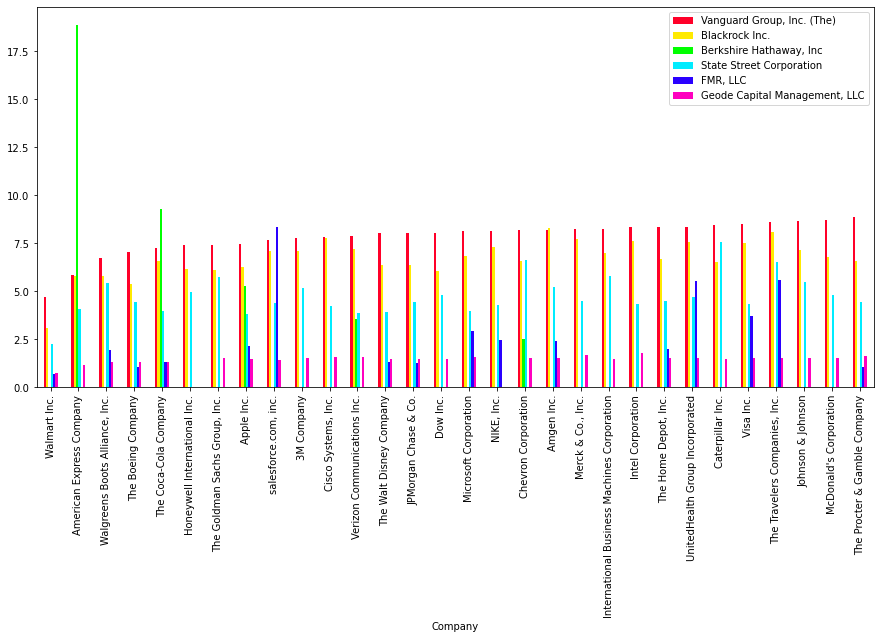

In [23]:
appl_top_6.sort_values('Vanguard Group, Inc. (The)').plot.bar(x='Company',
                                                              figsize=(15,7),
                                                              cmap='gist_rainbow')

In [20]:
vang_top_5 = appl_top_6.sort_values('Vanguard Group, Inc. (The)',ascending=False)[:5]
vang_top_5

Company  Vanguard Group, Inc. (The)  Blackrock Inc.  \
23   The Procter & Gamble Company                        8.85            6.58   
18         McDonald's Corporation                        8.70            6.80   
15              Johnson & Johnson                        8.66            7.16   
24  The Travelers Companies, Inc.                        8.62            8.08   
26                      Visa Inc.                        8.50            7.50   

    Berkshire Hathaway, Inc  State Street Corporation  FMR, LLC  \
23                      0.0                      4.43      1.04   
18                      0.0                      4.83      0.00   
15                      0.0                      5.47      0.00   
24                      0.0                      6.55      5.57   
26                      0.0                      4.34      3.73   

    Geode Capital Management, LLC  
23                           1.62  
18                           1.53  
15                           1.52  
24                           1.55  
26                           1.55

<AxesSubplot:ylabel='Company'>

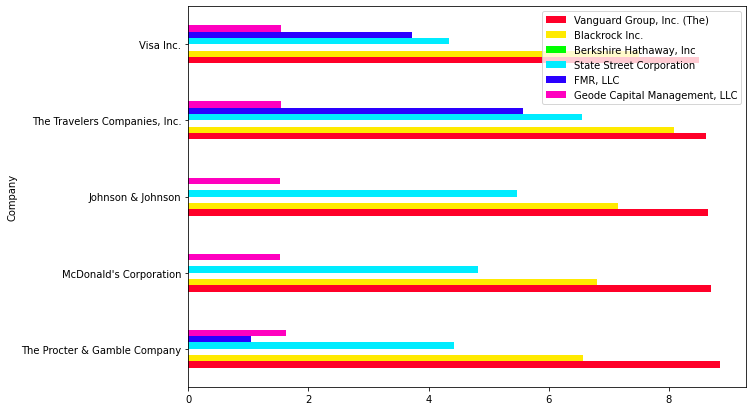

In [21]:
vang_top_5.plot.barh(x='Company',
                     figsize=(10,7),
                     cmap='gist_rainbow')

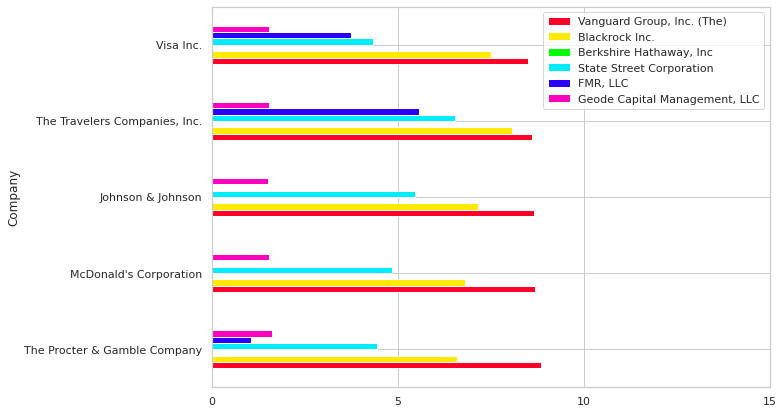

In [51]:
vang_top_5.plot.barh(x='Company',
                     figsize=(10,7),
                     cmap='gist_rainbow')
ax = plt.gca()
ax.set_xlim([0,15])
ax.set_xticks([0,5,10,15]);

In [32]:
import seaborn as sns

In [39]:
vang_top_5.columns

Index(['Company', 'Vanguard Group, Inc. (The)', 'Blackrock Inc.',
       'Berkshire Hathaway, Inc', 'State Street Corporation', 'FMR, LLC',
       'Geode Capital Management, LLC'],
      dtype='object')

<AxesSubplot:xlabel='Blackrock Inc.', ylabel='Vanguard Group, Inc. (The)'>

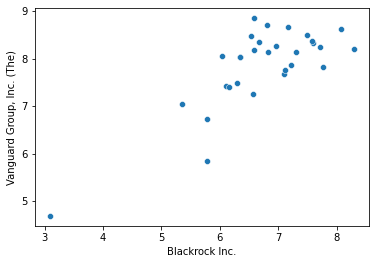

In [46]:
sns.scatterplot(data=appl_top_6, x="Blackrock Inc.", y="Vanguard Group, Inc. (The)")

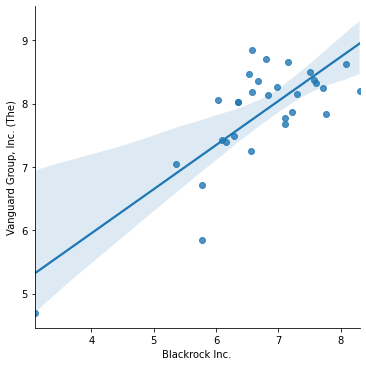

In [47]:
sns.lmplot(data=appl_top_6, x="Blackrock Inc.", y="Vanguard Group, Inc. (The)")

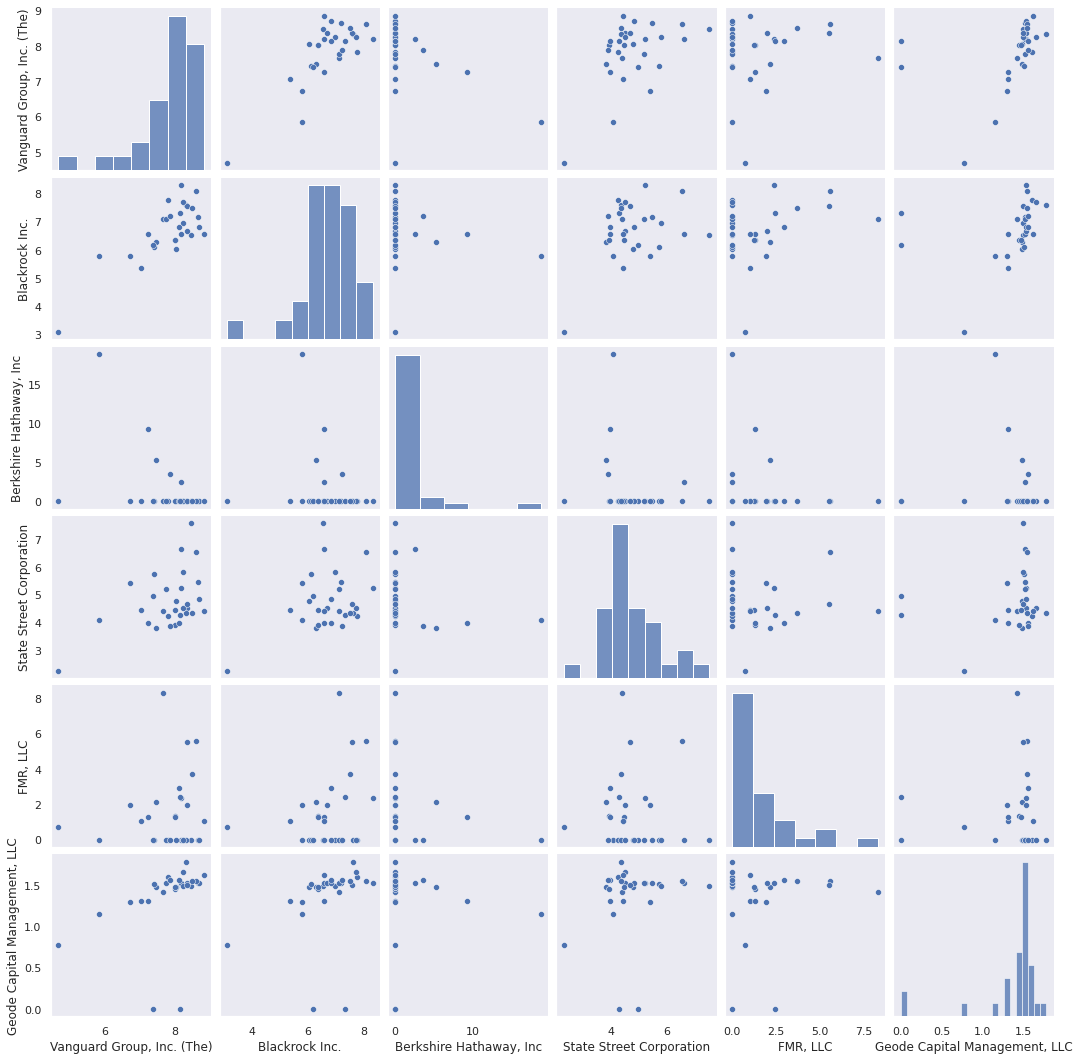

In [55]:
sns.pairplot(appl_top_6.loc[:,appl_top_6.columns != 'Company']);

In [48]:
df = sns.load_dataset("iris")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [57]:
sns.set(style="whitegrid")
# sns.set(style="dark")

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


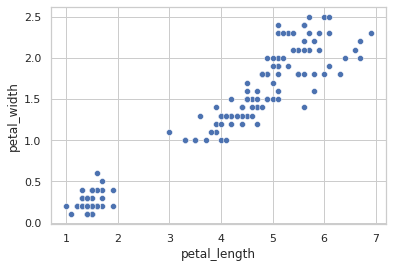

In [58]:
sns.scatterplot(df.petal_length,df.petal_width);

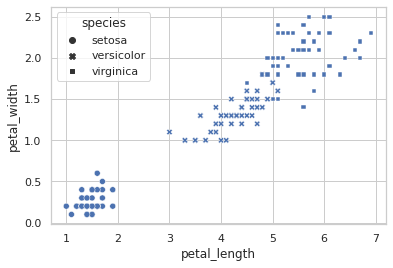

In [59]:
sns.scatterplot(x=df.petal_length,y=df.petal_width,style=df.species);

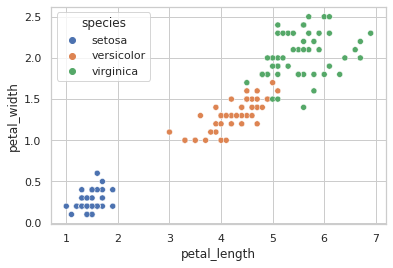

In [60]:
sns.scatterplot(x=df.petal_length,y=df.petal_width,hue=df.species);

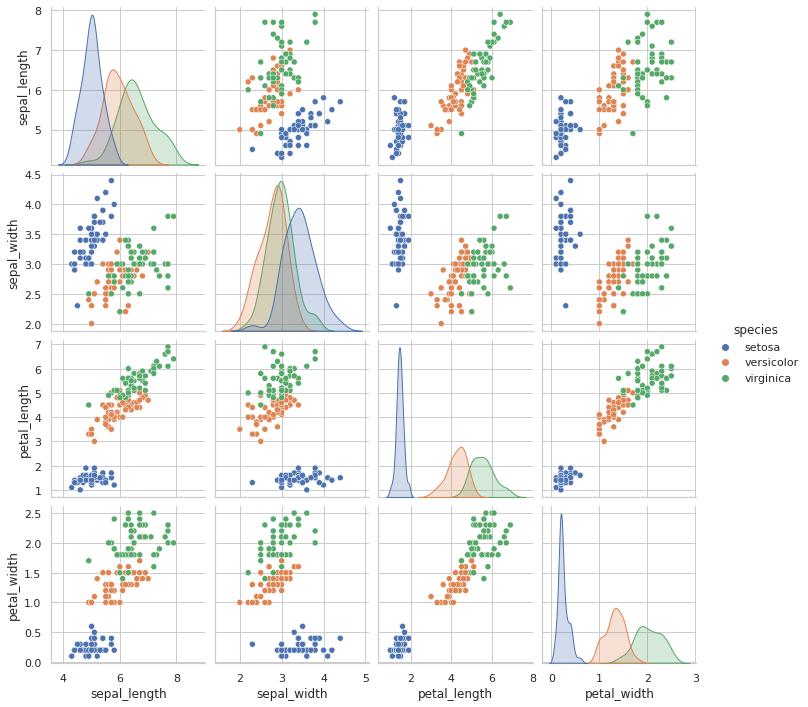

In [61]:
sns.pairplot(df,hue='species');

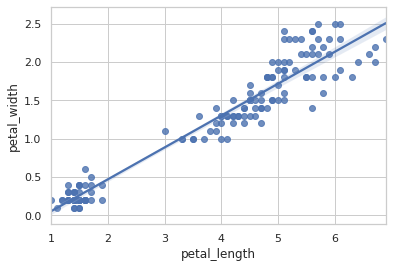

In [62]:
sns.regplot(x=df.petal_length,y=df.petal_width);

# Preview of next week

In [64]:
# from plotly.offline import init_notebook_mode, iplot
#import plotly.graph_objs as go
# init_notebook_mode(connected=True)
import plotly.express as px

In [66]:
fig = px.scatter(df, x='petal_length', y='petal_width', color="species")
fig.show()

In [68]:
px.scatter_3d(df,x='petal_length',y='petal_width',z='sepal_length',color='species')

In [63]:
def plotdows(ticker='AAPL'):
    few_days = si.get_data(ticker, start_date = '01/01/2020', end_date = '03/31/2021')
    fig,ax = plt.subplots(1,1,figsize=(7,5))
    ax.plot(few_days.index, few_days.high)
    ax.set_title(get_symbol(ticker))
    fig.autofmt_xdate()
    
dow_list = si.tickers_dow()
ipywidgets.interactive(plotdows,ticker=dow_list)

interactive(children=(Dropdown(description='ticker', options=('AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO…